In [1]:
#Module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#Read csv files as dataframes
train = pd.read_csv('D:/Downloads/Python/Titanic Project/Data/train.csv')
test = pd.read_csv('D:/Downloads/Python/Titanic Project/Data/test.csv')

# ***Training Data Set: Data Wrangling*** 
***

In [3]:
#Describe variable types in dataframe
#Total of 11 predictor variables and 1 reponse varaible 'Survived'
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Check for missing values in the training dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### Missing Data: Age
***

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

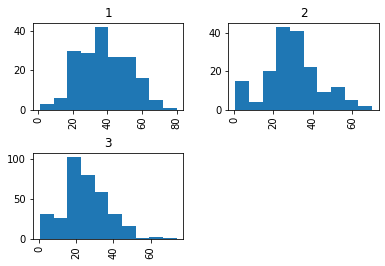

In [5]:
#Age histograms based on 'Pclass,' where 1 = 1st, 2 = 2nd, and 3 = 3rd
train.hist('Age', 'Pclass')

In [6]:
#Find the average age grouped by 'Pclass'
train.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [7]:
#Impute missing Ages based on 'Pclass' mean
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [8]:
#Verify that the values were filled
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Verify that the mean did not change after imputation
train.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


###### Missing Data: Cabin
***

In [10]:
#687 missing instances for 'Cabin'
#Based on Titanic cabin structure
#First class had cabins on A,B,or C, a mix of D or E
#Third class was mainly on F or G

#Create new varaible 'Deck' based on 'Cabin' variable to keep only the initial Letter and missing values as 'M'
train['Deck'] = train['Cabin'].str[0]
train['Deck']=train['Deck'].fillna('M')

In [11]:
#Check survival rate based on Cabin locarions
train.groupby('Deck')['Survived'].mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Deck'>

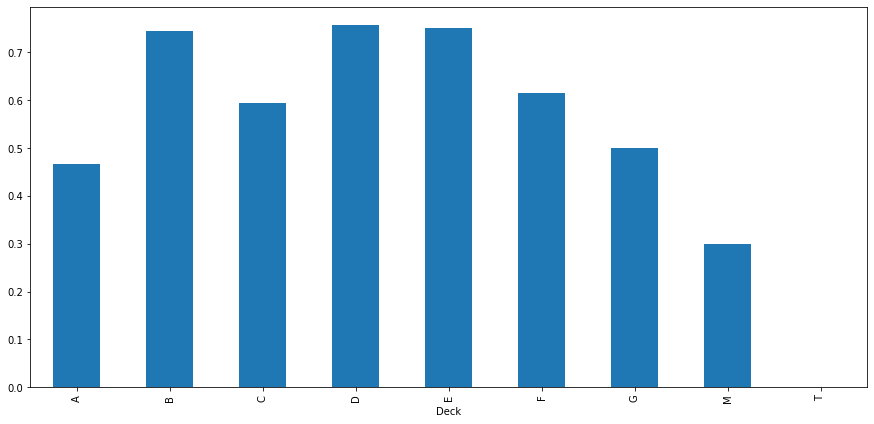

In [12]:
#Plot bar chart based on 'Deck' and 'Survival'
#Group by 'Deck' and plot mean survival rate
train.groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(15,7), label = 'rate')


In [13]:
#Survival rate varies according to cabin location on upper or lower decks
#Group cabin locations, looking at the data one instance of 'T', first class
train['Deck'] = train['Deck'].replace(['A','B','C','T'], 'Upper Deck')
train['Deck'] = train['Deck'].replace(['D','E'], 'Middle Deck')
train['Deck'] = train['Deck'].replace(['F','G'], 'Lower Deck')
train['Deck'].value_counts()

M              687
Upper Deck     122
Middle Deck     65
Lower Deck      17
Name: Deck, dtype: int64

In [14]:
#Keep missing instances of Cabin, since missing cabin instances make up a majority

###### Missing Data: Embarked
***

In [15]:
#2 instances of missing data, easily searchable
train.loc[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Upper Deck
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Upper Deck


In [16]:
#Both are 'Pclass' = 1, with Fare = 80.00 and Upper Deck
train.loc[(train['Pclass'] == 1 ) & (train['Fare'] <= 80) & (train['Deck'] == 'Upper Deck')]['Embarked'].value_counts()

S    38
C    26
Name: Embarked, dtype: int64

In [17]:
#Impute with 'S', further research into the individuals shows that these two passengers did board in Southampton
train['Embarked']=train['Embarked'].fillna('S')
#Verify imputation
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

###### All missing data from the training data set has been imputed
###### Next step is to encode categorical data
***

# ***Data Encoding***
***

In [18]:
#Take a look at the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
dtype: object

### Binning Data
***
###### Age & Fare

<AxesSubplot:>

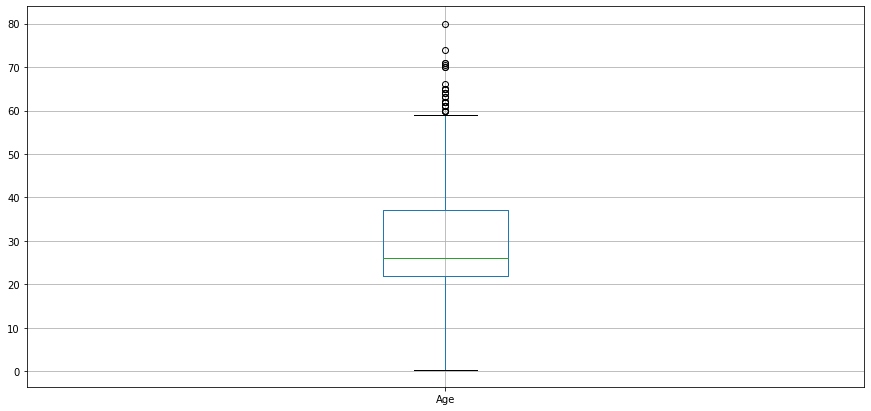

In [19]:
#Use boxplot to look for outliers and percentiles for 'Age'
train.boxplot(column=['Age'], figsize = (15,7))

In [20]:
#Outliers present in 'Age'
train['Age'].describe()

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
#Use dataframe.cut() to bin 'Age' based on specificed Bin amount
train['Age'] = pd.cut(train['Age'].astype(int), 5)

In [22]:
#Display the Bins allocated for 'Age'
train['Age'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

<AxesSubplot:>

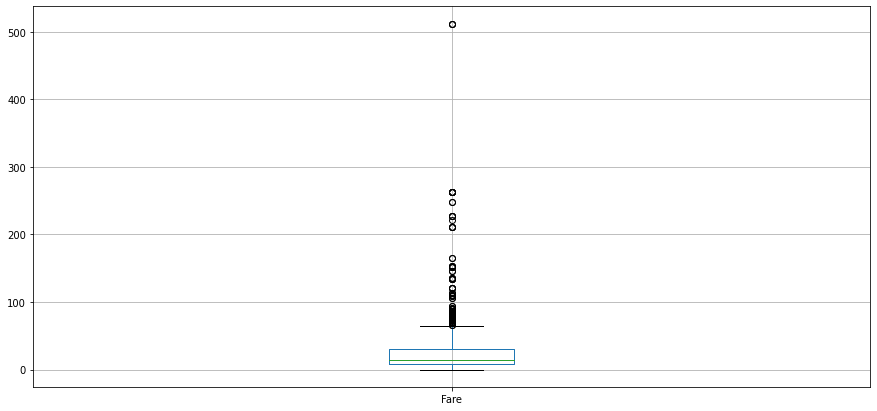

In [23]:
#Use boxplot to look for outliers and percentiles for 'Fare'
train.boxplot(column=['Fare'], figsize = (15,7))

In [24]:
#Outliers present in 'Fare' variable
#Use dataframe.qcut() to bin 'Fare' into specifed Bins, with similar allocation
train['Fare'] = pd.qcut(train['Fare'].astype(int), 5)

In [25]:
#Display the Bins allocated for 'Fare'
train['Fare'].value_counts()

(-0.001, 7.0]    241
(21.0, 39.0]     180
(39.0, 512.0]    176
(10.0, 21.0]     171
(7.0, 10.0]      123
Name: Fare, dtype: int64

In [26]:
#Verify 'Age' and 'Fare' have been binned and is a category type
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age            category
SibSp             int64
Parch             int64
Ticket           object
Fare           category
Cabin            object
Embarked         object
Deck             object
dtype: object

Survival rates for age groups: Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Age'>

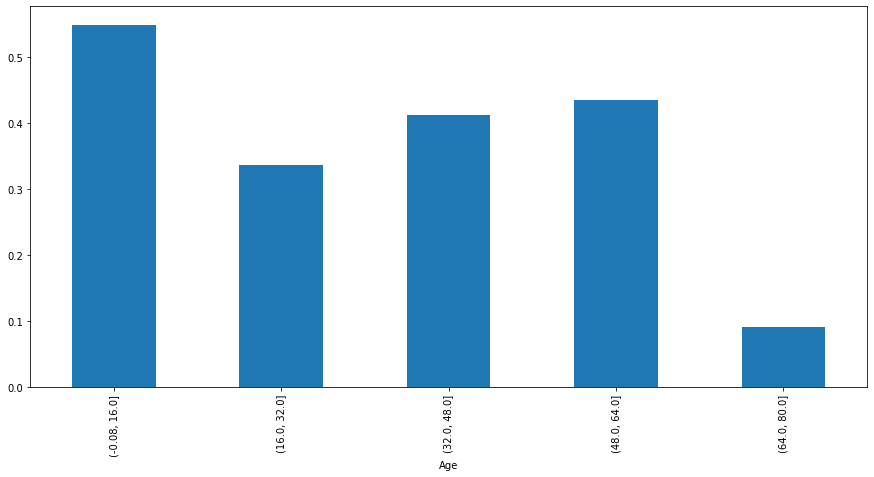

In [27]:
#Look at survival rates among different Binned categories
print('Survival rates for age groups:', train.groupby('Age')['Survived'].mean())
train.groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))

###### ***Survival rates for infants to 16 year olds were highest, with the elderly least likely to survive***

Survival rates for different fare groups: Fare
(-0.001, 7.0]    0.215768
(7.0, 10.0]      0.195122
(10.0, 21.0]     0.426901
(21.0, 39.0]     0.444444
(39.0, 512.0]    0.642045
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Fare'>

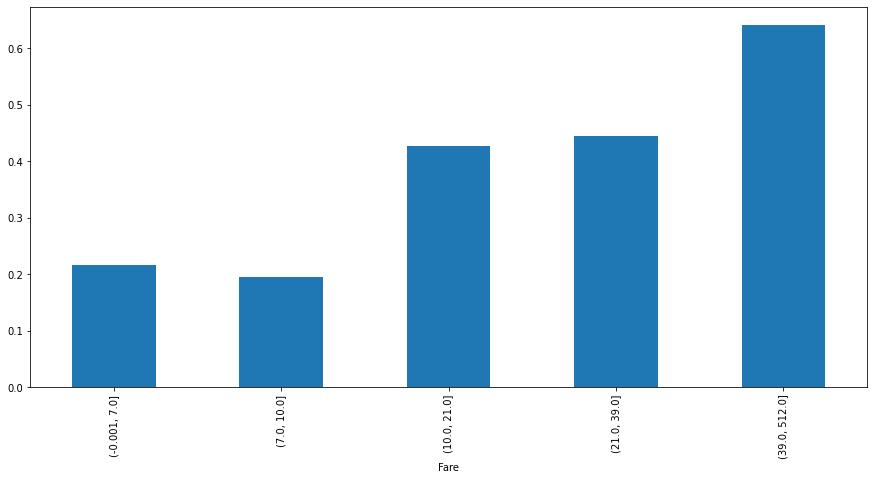

In [28]:
print('Survival rates for different fare groups:', train.groupby('Fare')['Survived'].mean())
train.groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))

###### ***Survival rates were higher with passengers with higher ticket fares***

## Create new summary variable from existing variables
***

In [29]:
#Create "Family Size" from "SibSp" sibling, or spouse, variable and 'Parch', guardian, variable in addition to one seld, +1
train['Family Size'] = train['SibSp'] + train['Parch'] + 1
train['Family Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family Size, dtype: int64

<AxesSubplot:>

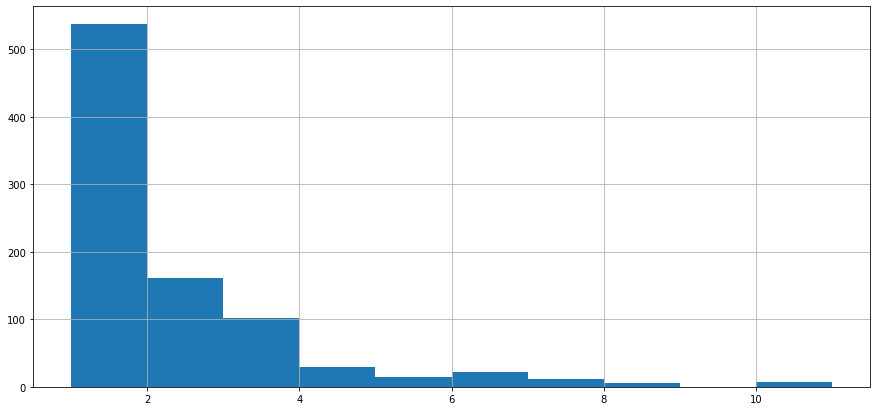

In [30]:
train['Family Size'].hist(figsize=(15,7))

In [31]:
#Create manual bins to capture data
#Bin 1 if single
#Bin 2 if family of 2
#Bin 3 if family of 3 or 4
#Bin 4 if family of 5 or greater
train['Family Bin'] = train['Family Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))
train['Family Bin'].value_counts()

1    537
2    161
3    131
4     62
Name: Family Bin, dtype: int64

Survival rates for different Family Sizes: Family Bin
1    0.303538
2    0.552795
3    0.610687
4    0.161290
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Family Bin'>

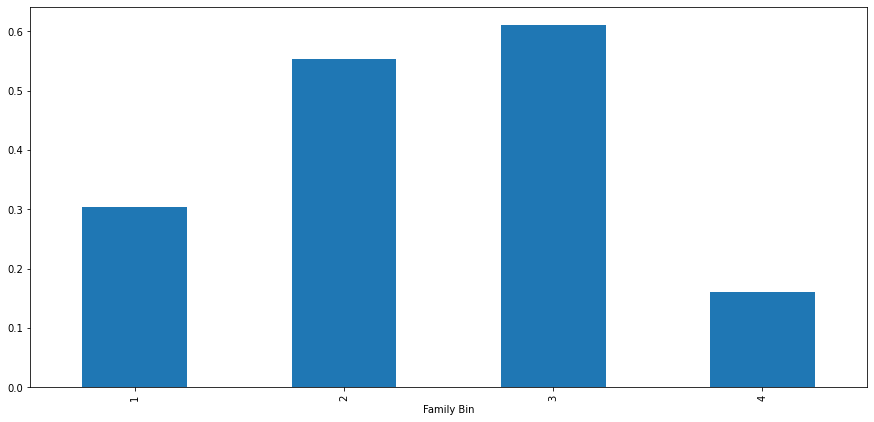

In [32]:
#Produce survival statistics for 'Family Bin' and 'Survived'
print('Survival rates for different Family Sizes:', train.groupby('Family Bin')['Survived'].mean())
train.groupby('Family Bin')['Survived'].mean().plot(kind='bar', figsize=(15,7))

###### ***Survival rates for families were higher than single passengers with the exception of families that were too large, ie. - 5 or more members***

## Variable: Tickets
***

In [33]:
#Taking a look at survival rate among 'Ticket'
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [34]:
#Tickets with multiple instances indicate group of travellers
#Group 'Ticket' by frequency count
train['Ticket Frequency'] = train.groupby('Ticket')['Ticket'].transform('count')
train['Ticket Frequency'].value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Ticket Frequency, dtype: int64

###### ***There are more individual passengers than there are grouped travellers***

Survival rates for different ticket frequencies: Ticket Frequency
1    0.297989
2    0.574468
3    0.698413
4    0.500000
5    0.000000
6    0.000000
7    0.238095
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Ticket Frequency'>

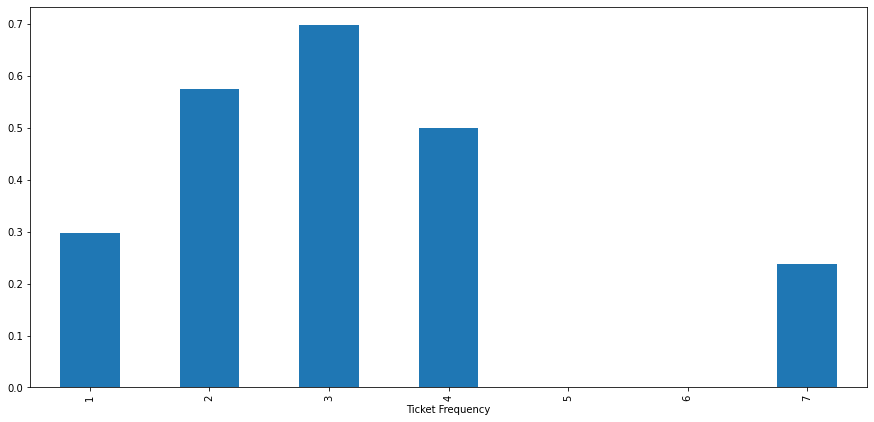

In [35]:
print('Survival rates for different ticket frequencies:', train.groupby('Ticket Frequency')['Survived'].mean())
train.groupby('Ticket Frequency')['Survived'].mean().plot(kind='bar', figsize=(15,7))

###### ***Different survival rates among ticket frequencies***

### Variable: Name Creating Title Variable
***

In [36]:
#Extract title from 'Name' variable to look at Marriage status
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [37]:
#Create "Married" varaible counts all titles with 'Mrs'
#Create empty variable and populate with 0 and replace with 1 if Title is 'Mrs'
train['Married'] = 0
train['Married'] = train['Married'].loc[train['Title'] == 'Mrs'] == 1

In [38]:
#Collapse titles with frequency less than 10
Misc = (train['Title']).value_counts() < 10
train['Title'] = train['Title'].apply(lambda x: 'Misc' if Misc.loc[x] == True else x)
train.groupby('Title')['Title'].count()

Title
Master     40
Misc       27
Miss      182
Mr        517
Mrs       125
Name: Title, dtype: int64

Survival rates based on Title: Title
Master    0.575000
Misc      0.444444
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Title'>

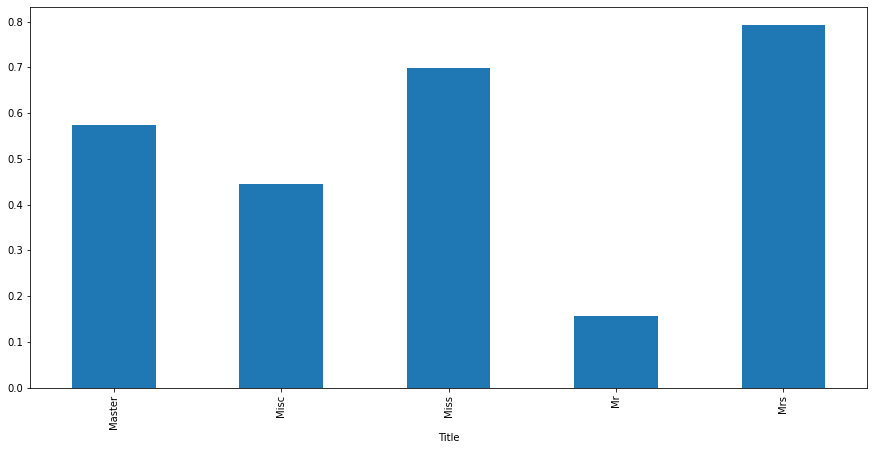

In [39]:
print('Survival rates based on Title:', train.groupby('Title')['Survived'].mean())
train.groupby('Title')['Survived'].mean().plot(kind='bar', figsize=(15,7))

###### *** Single and married females have a higher survival rate 

## Encoding Non-Numeric Variables
***

In [40]:
train.dtypes

PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                 category
SibSp                  int64
Parch                  int64
Ticket                object
Fare                category
Cabin                 object
Embarked              object
Deck                  object
Family Size            int64
Family Bin             int64
Ticket Frequency       int64
Title                 object
Married               object
dtype: object

###### ***Encode Sex Variable***

In [41]:
#Encode 'Sex' variable
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])

In [42]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [43]:
#Males encoded as 1, females encoded as 0
train.groupby('Sex')['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

###### ***Encode Embarked Variable***

In [44]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])

In [46]:
train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [47]:
#C encoded as 0, Q encoded as 1, S encoded as 2
train.groupby('Embarked')['Survived'].mean()

Embarked
0    0.553571
1    0.389610
2    0.339009
Name: Survived, dtype: float64

###### *** Encode Title Variable***

In [48]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [49]:
train['Title'] = LabelEncoder().fit_transform(train['Title'])
train['Title'].value_counts()

3    517
2    182
4    125
0     40
1     27
Name: Title, dtype: int64

In [50]:
#0 = Master, 1 = Misc, 2 = Miss, 3 = Mr, 4 = Mrs
train.groupby('Title')['Survived'].mean()

Title
0    0.575000
1    0.444444
2    0.697802
3    0.156673
4    0.792000
Name: Survived, dtype: float64

###### ***Deck Variable***

In [51]:
train['Deck'].value_counts()

M              687
Upper Deck     122
Middle Deck     65
Lower Deck      17
Name: Deck, dtype: int64

In [52]:
train['Deck'] = LabelEncoder().fit_transform(train['Deck'])
train['Deck'].value_counts()

1    687
3    122
2     65
0     17
Name: Deck, dtype: int64

In [53]:
#0 = Lower Deck, 1 = M, 2 = Middle Deck, 3 = Upper Deck
train.groupby('Deck')['Survived'].mean()

Deck
0    0.588235
1    0.299854
2    0.753846
3    0.631148
Name: Survived, dtype: float64

###### ***Fare Variable***

In [54]:
train['Fare'].value_counts()

(-0.001, 7.0]    241
(21.0, 39.0]     180
(39.0, 512.0]    176
(10.0, 21.0]     171
(7.0, 10.0]      123
Name: Fare, dtype: int64

In [55]:
train['Fare'] = LabelEncoder().fit_transform(train['Fare'])
train['Fare'].value_counts()

0    241
3    180
4    176
2    171
1    123
Name: Fare, dtype: int64

In [56]:
#(-0.001, 7.0] = 0
#(21.0, 39.0] = 3
#(39.0, 512.0] = 4
#(10.0, 21.0] = 2
#(7.0, 10.0] = 1
train.groupby('Fare')['Survived'].mean()

Fare
0    0.215768
1    0.195122
2    0.426901
3    0.444444
4    0.642045
Name: Survived, dtype: float64

###### ***Age Variable***

In [57]:
train['Age'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

In [58]:
train['Age'] = LabelEncoder().fit_transform(train['Age'])
train['Age'].value_counts()

1    495
2    216
0    100
3     69
4     11
Name: Age, dtype: int64

In [59]:
#(16.0, 32.0]     = 1
#(32.0, 48.0]     = 2 
#(-0.08, 16.0]    = 0
#(48.0, 64.0]     = 3
#(64.0, 80.0]     = 4
train.groupby('Age')['Survived'].mean()

Age
0    0.550000
1    0.337374
2    0.412037
3    0.434783
4    0.090909
Name: Survived, dtype: float64

###### ***Married Variable***

In [60]:
train['Married'].value_counts()

False    125
Name: Married, dtype: int64

In [61]:
train['Married'] = LabelEncoder().fit_transform(train['Married'])
train['Married'].value_counts()

1    766
0    125
Name: Married, dtype: int64

In [62]:
#Married = 0, Unmarried = 1
train.groupby('Married')['Survived'].mean()

Married
0    0.792000
1    0.317232
Name: Survived, dtype: float64

## Hot Encode New Categorical Variables
***

In [63]:
train.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                  int32
Age                  int32
SibSp                int64
Parch                int64
Ticket              object
Fare                 int32
Cabin               object
Embarked             int32
Deck                 int32
Family Size          int64
Family Bin           int64
Ticket Frequency     int64
Title                int32
Married              int32
dtype: object

In [64]:
categories = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare']
encoded_features = []

In [65]:
from sklearn.preprocessing import OneHotEncoder

for feature in categories:
    encoded_feat = OneHotEncoder().fit_transform(train[feature].values.reshape(-1, 1 )).toarray()
    n = train[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n+1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = train.index
    encoded_features.append(encoded_df)
    
train = pd.concat([train, *encoded_features], axis=1)

## Create Model Based on Training Data Set
***

In [66]:
train.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                   int32
Age                   int32
SibSp                 int64
Parch                 int64
Ticket               object
Fare                  int32
Cabin                object
Embarked              int32
Deck                  int32
Family Size           int64
Family Bin            int64
Ticket Frequency      int64
Title                 int32
Married               int32
Pclass_1            float64
Pclass_2            float64
Pclass_3            float64
Sex_1               float64
Sex_2               float64
Embarked_1          float64
Embarked_2          float64
Embarked_3          float64
Title_1             float64
Title_2             float64
Title_3             float64
Title_4             float64
Title_5             float64
Deck_1              float64
Deck_2              float64
Deck_3              float64
Deck_4              float64
Family Bin_1        

In [67]:
#Drop Columns training data set will not use to model
drop = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare', 'PassengerId', 'Name', 'SibSp',
       'Parch','Ticket', 'Cabin', 'Family Size', 'Survived']

###### ***Logistic Regressoin***

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
#Create seperate dataframes containing predictor variables and the response variable
X = train.drop(drop, axis = 1)
y = train['Survived']

In [70]:
#Split training dataset by 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
#Fit logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
#Create prediction based on model
y_pred = log_reg.predict(X_test)

In [72]:
#Check the accuarcy of the model
accuracy_score(y_pred, y_test)

0.8385650224215246

In [73]:
#Create a confusion matrix
confusion_matrix(y_pred, y_test)

array([[120,  17],
       [ 19,  67]], dtype=int64)

###### 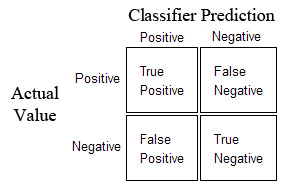

###### ***120 True positives, 68 True negatives, 188 correctly predicted***
###### ***19 False positives, 16 false negative, 35 incorrectly predicted***


In [74]:
tp, fn, fp, tn = confusion_matrix(y_pred, y_test).ravel()
print("True Positives: ",tp)
print("False Negatives: ",fn)
print("False Positives: ",fp)
print("True Negatives: ",tn)

True Positives:  120
False Negatives:  17
False Positives:  19
True Negatives:  67


In [75]:
#Precision 
Precision = tp/(tp+fp) 
print(Precision)

0.8633093525179856


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       137
           1       0.80      0.78      0.79        86

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



###### ***Logistic Regression Model has an 84% accuarcy and a 86% precision***

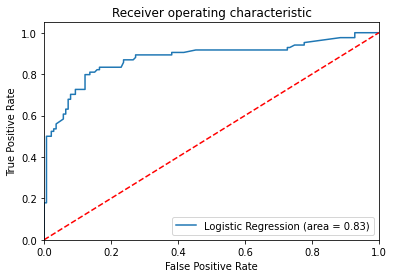

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
roc_auc_score(y_test, log_reg.predict(X_test))

0.8304642000685166

###### ***Area Under Curce Score of 83%***

### Data Wrangling and Encoding the Test Data Set
***

In [79]:
#Check for missing values in the training dataset
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [80]:
#Find the average age grouped by 'Pclass'
test.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [81]:
#Impute missing Ages based on 'Pclass' mean
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'))

In [82]:
#Create new varaible 'Deck' based on 'Cabin' variable to keep only the initial Letter and missing values as 'M'
test['Deck'] = test['Cabin'].str[0]
test['Deck']=test['Deck'].fillna('M')

In [83]:
test['Deck'] = test['Deck'].replace(['A','B','C','T'], 'Upper Deck')
test['Deck'] = test['Deck'].replace(['D','E'], 'Middle Deck')
test['Deck'] = test['Deck'].replace(['F','G'], 'Lower Deck')
test['Deck'].value_counts()

M              327
Upper Deck      60
Middle Deck     22
Lower Deck       9
Name: Deck, dtype: int64

In [84]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,M


In [85]:
test.groupby('Pclass', as_index=False)['Fare'].mean()

,Pclass,Fare
0,1,94.280297
1,2,22.202104
2,3,12.459678


In [86]:
test['Fare']=test['Fare'].fillna(12.45)

In [87]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Deck             0
dtype: int64

In [88]:
#Use dataframe.cut() to bin 'Age' based on specificed Bin amount
test['Age'] = pd.cut(test['Age'].astype(int), 5)

In [89]:
test['Fare'] = pd.qcut(test['Fare'].astype(int), 5)

In [90]:
test['Family Size'] = test['SibSp'] + test['Parch'] + 1
test['Family Size'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family Size, dtype: int64

In [91]:
test['Family Bin'] = test['Family Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))
test['Family Bin'].value_counts()

1    253
2     74
3     71
4     20
Name: Family Bin, dtype: int64

In [92]:
test['Ticket Frequency'] = test.groupby('Ticket')['Ticket'].transform('count')
test['Ticket Frequency'].value_counts()

1    321
2     66
3     18
4      8
5      5
Name: Ticket Frequency, dtype: int64

In [93]:
#Extract title from 'Name' variable to look at Marriage status
test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [94]:
#Create "Married" varaible counts all titles with 'Mrs'
#Create empty variable and populate with 0 and replace with 1 if Title is 'Mrs'
test['Married'] = 0
test['Married'] = test['Married'].loc[test['Title'] == 'Mrs'] == 1

In [95]:
#Collapse titles with frequency less than 10
Misc = (test['Title']).value_counts() < 10
test['Title'] = test['Title'].apply(lambda x: 'Misc' if Misc.loc[x] == True else x)
test.groupby('Title')['Title'].count()

Title
Master     21
Misc        7
Miss       78
Mr        240
Mrs        72
Name: Title, dtype: int64

In [96]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])
test['Title'] = LabelEncoder().fit_transform(test['Title'])
test['Deck'] = LabelEncoder().fit_transform(test['Deck'])
test['Fare'] = LabelEncoder().fit_transform(test['Fare'])
test['Age'] = LabelEncoder().fit_transform(test['Age'])
test['Married'] = LabelEncoder().fit_transform(test['Married'])

In [97]:
categories = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare']
encoded_features = []

for feature in categories:
    encoded_feat = OneHotEncoder().fit_transform(test[feature].values.reshape(-1, 1 )).toarray()
    n = test[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n+1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = test.index
    encoded_features.append(encoded_df)
    
test = pd.concat([test, *encoded_features], axis=1)

In [98]:
#Drop Columns testing data set will not use to model
drop_1 = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare', 'PassengerId', 'Name', 'SibSp',
       'Parch','Ticket', 'Cabin', 'Family Size']
PassengerId = pd.DataFrame(test['PassengerId'])
Sub_Test = test.drop(drop_1, axis = 1)

In [99]:
Sub_Pred = log_reg.predict(Sub_Test)
Sub_Pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
Survived = Sub_Pred.tolist()

In [101]:
PassengerId['Survived'] = Survived
PassengerId

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
PassengerId.to_csv(r'D:\Downloads\Python\Titanic Project\Submission_Logisitc_Regresssion.csv', index = False, header = True)

## Random Forest Classifier
***

In [103]:
#Initialize Random Forest Classifier
#Standarize variables
from sklearn.preprocessing import StandardScaler

#Drop Columns training data set will not use to model
drop = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare', 'PassengerId', 'Name', 'SibSp',
       'Parch','Ticket', 'Cabin', 'Family Size', 'Survived']


X_RFC = StandardScaler().fit_transform(train.drop(columns=drop))
y_RFC = train['Survived'].values

In [104]:
#Creating Training and Test Splits, same as logisitc regressssion split
#Split training dataset by 75% training and 25% testing
X_train, X_test1, y_tr1ain, y_test1 = train_test_split(X_RFC, y_RFC, test_size = 0.25, random_state = 0)

In [105]:
#Define Model Parameters
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                                              n_estimators = 1750,
                                              max_depth=7,
                                              min_samples_split=6,
                                              min_samples_leaf=6,
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=42,
                                              n_jobs=-1,
                                              verbose=1)

In [106]:
#Fit the Random Forest Classifier model
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.4s finished


RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=1750, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

In [107]:
#score the model
model.score(X_test1, y_test1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.1s finished


0.8251121076233184

###### ***Model Accuarcy is 83%***

In [108]:
model_predict = model.predict(X_test1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.1s finished


In [109]:
#Confusion Matrix
tp, fn, fp, tn = confusion_matrix(y_test1, model_predict).ravel()
print("True Positives: ",tp)
print("False Negatives: ",fn)
print("False Positives: ",fp)
print("True Negatives: ",tn)

True Positives:  121
False Negatives:  18
False Positives:  21
True Negatives:  63


In [110]:
#Classification Report
print(classification_report(y_test1, model_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.78      0.75      0.76        84

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



In [111]:
#Mean AUC Score
from sklearn.model_selection import cross_val_score
model_cv_score = cross_val_score(model, X_RFC, y_RFC, cv=10, scoring = 'roc_auc')
print("Mean AUC Score - Random Forest: ", model_cv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    0.3s fin

Mean AUC Score - Random Forest:  0.8707548312254195


###### ***Area under the ROC Curve: 87%***

In [112]:
#Score Test CVS
#Drop Columns testing data set will not use to model
drop_1 = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family Bin', 'Age', 'Fare', 'PassengerId', 'Name', 'SibSp',
       'Parch','Ticket', 'Cabin', 'Family Size']
PassengerId = pd.DataFrame(test['PassengerId'])
RFC_Sub_Test = StandardScaler().fit_transform(test.drop(drop_1, axis = 1))


In [113]:
predictions = model.predict(RFC_Sub_Test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.1s finished


In [114]:
RFC_Predictions = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions})

In [115]:
RFC_Predictions.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [116]:
RFC_Predictions.to_csv(r'D:\Downloads\Python\Titanic Project\RFC_Predictions.csv', index = False, header = True)

## Logistic Regression Model with an accuarcy of 84% and an Area under ROC Curve of 83%
## Random Forest Classifier with an accuarcy of 83% and an Area under ROC Curve of 87%
## Difference of 17 Mismatched predictions between the two model